In [0]:
import torch 
import torchvision
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from google.colab import files
uploaded = files.upload() # import reg_multi.npy

Saving reg_multi.npy to reg_multi (1).npy


In [0]:
data = np.load('reg_multi.npy')

In [0]:
def standardize(X):
    mean = np.mean(X, axis=0)
    standard_deviation = np.std(X, axis=0)
    standarized_X = np.array([[(x - mean[i]) / standard_deviation[i] for i, x in enumerate(row)] for row in X])
    return standarized_X, mean, standard_deviation

In [42]:
xs = data[:, :16]
ys = data[:,16]
xs, mean, std = standardize(xs)
print(xs.shape)

(60000, 16)


In [0]:
t_xs = torch.from_numpy(xs) 
t_ys = torch.from_numpy(ys).view(-1,1)

In [0]:
model = torch.nn.Sequential(torch.nn.Linear(16,512),
                            torch.nn.ReLU(), 
                            torch.nn.Dropout(p=0.1),
                            torch.nn.Linear(512,128),
                            torch.nn.ReLU(), 
                            torch.nn.Dropout(p=0.2),
                            torch.nn.Linear(128,32),
                            torch.nn.ReLU(), 
                            torch.nn.Linear(32,16),
                            torch.nn.ReLU(), 
                            torch.nn.Linear(16,1))

In [0]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
train_set_len = 50000
train_set, valid_set = torch.utils.data.random_split(dataset,(train_set_len,len(dataset) - train_set_len))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =0.01)

In [0]:
err_train=[]
err_valid=[]

In [47]:
%%time

for epoch in range(501):    
    for d in train_loader:
        optimizer.zero_grad()
        features,target = d
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
   
    if epoch%10 == 0:
        with torch.no_grad():
            vpred  = model(valid_set[:][0])
            vloss  = loss_func(vpred,valid_set[:][1])
            err_valid.append(vloss)
            pred  = model(train_set[:][0])
            loss  = loss_func(pred,train_set[:][1])
            err_train.append(loss)
        print("epoch %d %f %f" % (epoch, loss, vloss))   

epoch 0 0.308738 0.302027
epoch 10 0.307838 0.301314
epoch 20 0.306597 0.300663
epoch 30 0.304013 0.298827
epoch 40 0.294727 0.292874
epoch 50 0.259232 0.266218
epoch 60 0.194909 0.212118
epoch 70 0.159113 0.183133
epoch 80 0.136000 0.157314
epoch 90 0.121817 0.141128
epoch 100 0.110536 0.134473
epoch 110 0.105913 0.126319
epoch 120 0.100444 0.116490
epoch 130 0.095823 0.115755
epoch 140 0.092952 0.111014
epoch 150 0.089824 0.109943
epoch 160 0.086194 0.107097
epoch 170 0.084751 0.106996
epoch 180 0.083078 0.103768
epoch 190 0.078772 0.100760
epoch 200 0.077581 0.097036
epoch 210 0.077603 0.095621
epoch 220 0.075581 0.094776
epoch 230 0.073608 0.093688
epoch 240 0.072360 0.092967
epoch 250 0.071528 0.090766
epoch 260 0.069933 0.091690
epoch 270 0.067929 0.087408
epoch 280 0.067814 0.088163
epoch 290 0.066062 0.086199
epoch 300 0.067851 0.089158
epoch 310 0.066597 0.086518
epoch 320 0.063987 0.085792
epoch 330 0.064672 0.084496
epoch 340 0.063724 0.083890
epoch 350 0.062823 0.082126
epo

In [48]:
with torch.no_grad():
    pred = model(valid_set[:][0])
    vloss  = loss_func(vpred,valid_set[:][1])
print("Validation loss: " + str(vloss))

Validation loss: tensor(0.0749)


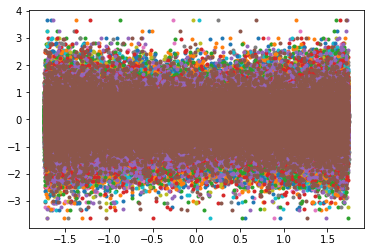

In [49]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

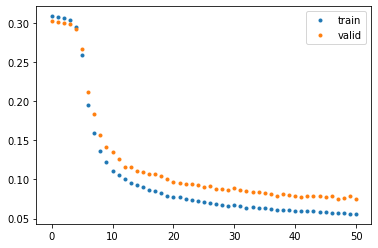

In [50]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

In [52]:
filename = "reg-multi-model.pt"
torch.save(model, filename)
files.download(filename) 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
